In [1]:
import glob
import pandas as pd
from src.utils import map_category
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from datasets import load_from_disk


In [79]:
aug_stream_data = load_from_disk("data/processed/aug_stream_data")
aug_stream_valid = aug_stream_data["validation"]
labels = aug_stream_data["validation"].features["label"].names


In [80]:
name2code = {
    "Astrophysics": 0,
    "Condensed Matter": 1,
    "Computer Science": 2,
    "Economics": 3,
    "Electrical Engineering and Systems Science": 4,
    "General Relativity and Quantum Cosmology": 5,
    "High Energy Physics - Experiment": 6,
    "High Energy Physics - Lattice": 7,
    "High Energy Physics - Phenomenology": 8,
    "High Energy Physics - Theory": 9,
    "Mathematics": 10,
    "Mathematical Physics": 11,
    "Nonlinear Sciences": 12,
    "Nuclear Experiment": 13,
    "Nuclear Theory": 14,
    "Physics": 15,
    "Quantitative Biology": 16,
    "Quantitative Finance": 17,
    "Quantum Physics": 18,
    "Statistics": 19
}

candidate_labels = list(name2code.keys())


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")


Device set to use cuda:0


In [60]:
# Apply the pipeline to the 'text' column
def predict(batch):
    return {"predictions": classifier(batch["text"], candidate_labels)}

# Use batched=True for faster inference
results = aug_stream_valid.map(predict, batched=True, batch_size=8)


Map:   0%|          | 0/1382 [00:00<?, ? examples/s]

In [64]:
predicted_labels = [pred["labels"][0] for pred in results["predictions"]]


In [76]:
y_preds = [name2code.get(label, "other") for label in predicted_labels]


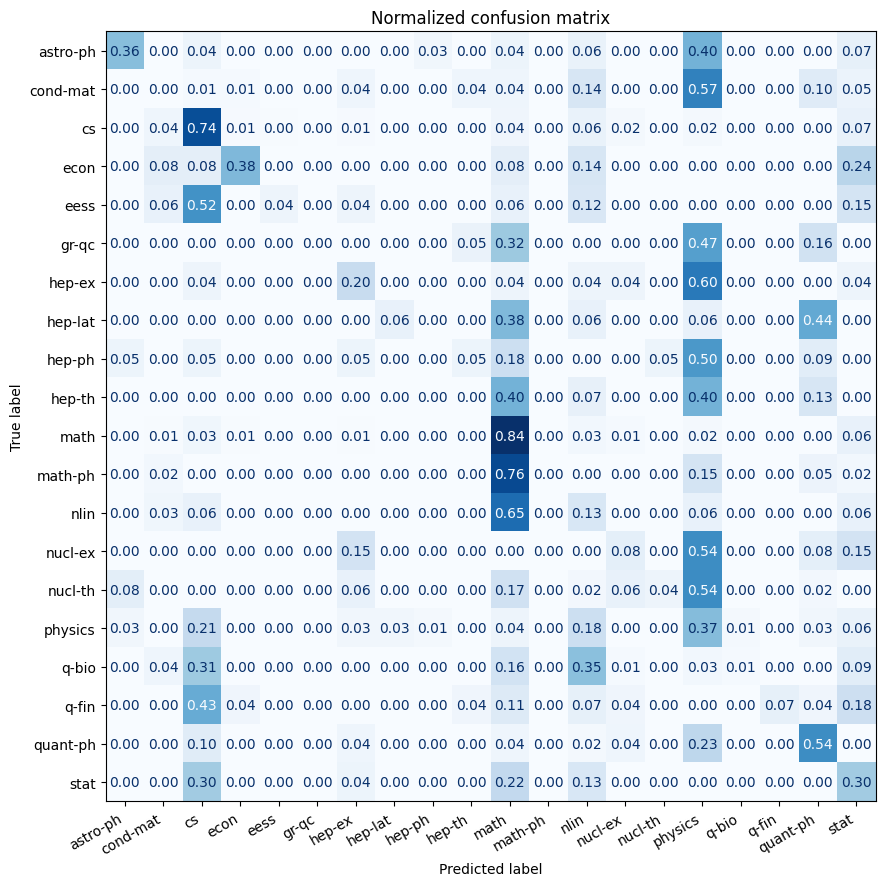

In [81]:
from src.utils import plot_confusion_matrix

plot_confusion_matrix(y_preds, y_valid, labels)


In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, y_preds, target_names=labels))


              precision    recall  f1-score   support

    astro-ph       0.78      0.36      0.49        70
    cond-mat       0.00      0.00      0.00        80
          cs       0.77      0.74      0.76       474
        econ       0.67      0.38      0.48        37
        eess       0.50      0.04      0.08        48
       gr-qc       0.00      0.00      0.00        19
      hep-ex       0.19      0.20      0.20        25
     hep-lat       0.25      0.06      0.10        16
      hep-ph       0.00      0.00      0.00        22
      hep-th       0.00      0.00      0.00        15
        math       0.54      0.84      0.66       192
     math-ph       0.00      0.00      0.00        41
        nlin       0.04      0.13      0.06        31
     nucl-ex       0.05      0.08      0.06        13
     nucl-th       0.67      0.04      0.08        48
     physics       0.12      0.37      0.19        71
       q-bio       0.50      0.01      0.03        77
       q-fin       1.00    

/cluster/processing/climate_llm/learn/aa/Advanced-Analytics-03/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/cluster/processing/climate_llm/learn/aa/Advanced-Analytics-03/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/cluster/processing/climate_llm/learn/aa/Advanced-Analytics-03/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 